# Recognizing 7 seg digit
### input are values of 7 segments of the digital display. output is a binary representation of the number shown

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from keras.layers.normalization import BatchNormalization
from IPython.display import SVG
from keras.utils.visualize_util import plot
from keras.utils.visualize_util import model_to_dot

Using TensorFlow backend.


input and output data

In [2]:
zer = [1,1,1,1,1,1,0]
one = [0,1,1,0,0,0,0]
two = [1,1,0,1,1,0,1]
thr = [1,1,1,1,0,0,1]
fou = [0,1,1,0,0,1,1]
fiv = [1,0,1,1,0,1,1]
six = [1,0,1,1,1,1,1]
sev = [1,1,1,0,0,0,0]
eig = [1,1,1,1,1,1,1]
nin = [1,1,1,1,0,1,1]
eij = [1,1,1,0,1,1,1] #A
see = [1,0,0,1,1,1,0] #C
eee = [1,0,0,1,1,1,1] #E
eff = [1,0,0,0,1,1,1] #F
inp=[zer, one, two, thr, fou, fiv, six, sev, eig, nin, eij, see, eee, eff]
out=[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,1,0,0],[1,1,1,0],[1,1,1,1]]

X_df=pd.DataFrame(inp,columns=['l1','l2','l3','l4','l5','l6','l7'])
X_df
Y_df=pd.DataFrame(out,columns=['b0','b1','b2','b3'])
Y_df
print(X_df.shape, Y_df.shape)
X=X_df.values
Y=Y_df.values

(14, 7) (14, 4)


NN model

In [3]:
model = Sequential()
L1=Dense( units=7, input_shape=(7,), activation='relu')
model.add(L1)
L2=Dense(units=4, activation='relu') # sigmoid
model.add(L2)
model.compile(loss='mse',optimizer='rmsprop', metrics=['accuracy'])
my_sgd = optimizers.SGD(lr=0.01, momentum=0.5, decay=0.1, nesterov=True)


#model.add(Dense( units=7, input_shape=(7,), activation='relu'))
#model.add(BatchNormalization())
#model.add(model.add(lambda(rectifier)))
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mse', optimizer='adagrad', metrics=['accuracy'])
#model.compile(loss='mse',optimizer='sgd', metrics=['binary_accuracy'])

#plot(model, to_file='model.png',show_shapes=True)
#SVG(model_to_dot(model).create(prog='dot', format='svg'))

train

In [4]:
epochs=5000
hist = model.fit(X, Y, epochs=epochs,  verbose=0, shuffle=True) #batch_size=5,

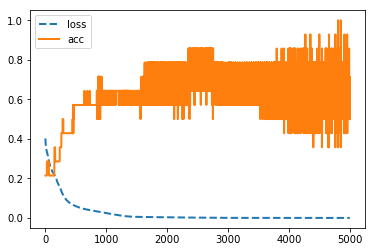

In [5]:
x = np.linspace(0,epochs-1,epochs)
plt.plot(x, hist.history['loss'], '--', linewidth=2, label='loss')
plt.plot(x, hist.history['acc'], '-', linewidth=2, label='acc')
plt.legend()
plt.show()

check results

In [6]:
loss_and_metrics = model.evaluate(X, Y)
print(loss_and_metrics)

14/14 [==============================] - 0s
[2.4586834115325473e-05, 0.78571426868438721]


check the layers

In [7]:
L1.get_weights()
L2.get_weights()

[array([[-2.07848167,  1.36621284,  0.69455928, -0.38856548],
        [ 1.62955022,  0.8616792 ,  0.75343639,  1.04215324],
        [-0.14136663, -0.36669043, -0.68399763, -0.32228771],
        [ 0.74562657, -1.36019182, -0.71207422, -0.63417536],
        [ 1.67095602,  0.9021976 ,  1.20596802, -0.92544335],
        [ 0.07369877, -0.65094727,  0.33365941,  1.54552782],
        [-0.40292522,  0.16574317,  1.33869433, -0.59442252]], dtype=float32),
 array([-0.96774238,  0.24066781, -1.22687876,  0.581698  ], dtype=float32)]

In [8]:
#proba = model.predict_proba(inp, batch_size=10)
pred = model.predict(inp)

In [9]:
for co,i in enumerate(pred):
    c=[]
    for j in i:
        if j>0.5: c.append(1)
        else: c.append(0)
    if c==out[co]: 
        st="O"
    else:
        st="X"
    print(i,c, out[co], st)

[ 0.  0.  0.  0.] [0, 0, 0, 0] [0, 0, 0, 0] O
[ 0.          0.          0.          0.99373496] [0, 0, 0, 1] [0, 0, 0, 1] O
[ 0.          0.          0.99387968  0.        ] [0, 0, 1, 0] [0, 0, 1, 0] O
[ 0.          0.          0.99455106  0.98950094] [0, 0, 1, 1] [0, 0, 1, 1] O
[ 0.          0.99529529  0.          0.        ] [0, 1, 0, 0] [0, 1, 0, 0] O
[ 0.          1.00051272  0.          0.99212456] [0, 1, 0, 1] [0, 1, 0, 1] O
[ 0.          0.98924488  0.9901799   0.        ] [0, 1, 1, 0] [0, 1, 1, 0] O
[ 0.          0.99741209  0.99533784  0.99236757] [0, 1, 1, 1] [0, 1, 1, 1] O
[ 0.99408227  0.          0.          0.        ] [1, 0, 0, 0] [1, 0, 0, 0] O
[ 0.99149317  0.          0.          0.98825109] [1, 0, 0, 1] [1, 0, 0, 1] O
[ 0.9912973   0.          0.99315155  0.        ] [1, 0, 1, 0] [1, 0, 1, 0] O
[ 0.99627572  0.99414498  0.          0.        ] [1, 1, 0, 0] [1, 1, 0, 0] O
[ 0.99326187  0.99222577  0.98737442  0.        ] [1, 1, 1, 0] [1, 1, 1, 0] O
[ 0.9960261   0.99